## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

## Loading The Data

In [2]:
df = pd.read_csv('Road.csv')
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


## Understand The Data

In [3]:
df.shape

(12316, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [5]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [6]:
df.nunique()

Time                           1074
Day_of_week                       7
Age_band_of_driver                5
Sex_of_driver                     3
Educational_level                 7
Vehicle_driver_relation           4
Driving_experience                7
Type_of_vehicle                  17
Owner_of_vehicle                  4
Service_year_of_vehicle           6
Defect_of_vehicle                 3
Area_accident_occured            14
Lanes_or_Medians                  7
Road_allignment                   9
Types_of_Junction                 8
Road_surface_type                 5
Road_surface_conditions           4
Light_conditions                  4
Weather_conditions                9
Type_of_collision                10
Number_of_vehicles_involved       6
Number_of_casualties              8
Vehicle_movement                 13
Casualty_class                    4
Sex_of_casualty                   3
Age_band_of_casualty              6
Casualty_severity                 4
Work_of_casuality           

## Data Cleaning

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [9]:
# Handle missing values

numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

categorical_cols = df.select_dtypes(include='object').columns

df[categorical_cols].isnull().sum()

df.dropna(subset=categorical_cols, inplace=True)

In [10]:
df.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [11]:
df_new = df[["Time", "Day_of_week", "Age_band_of_driver", "Driving_experience", "Type_of_vehicle", "Area_accident_occured",
            "Lanes_or_Medians", "Types_of_Junction", "Cause_of_accident", "Accident_severity"]]

In [12]:
df_new.nunique()

Time                     742
Day_of_week                7
Age_band_of_driver         5
Driving_experience         7
Type_of_vehicle           17
Area_accident_occured     12
Lanes_or_Medians           7
Types_of_Junction          8
Cause_of_accident         20
Accident_severity          3
dtype: int64

## Treatment of categorical variables

In [13]:
df_new['Type_of_vehicle'].unique()

array(['Lorry (41?100Q)', 'Automobile', 'Public (> 45 seats)',
       'Long lorry', 'Lorry (11?40Q)', 'Taxi', 'Public (12 seats)',
       'Ridden horse', 'Other', 'Pick up upto 10Q', 'Bajaj',
       'Public (13?45 seats)', 'Motorcycle', 'Stationwagen',
       'Special vehicle', 'Turbo', 'Bicycle'], dtype=object)

In [14]:
# Treatment of the vehicle type variable in order to reduce the number of classes

category_mapping = {
    'Automobile': 'Car',
    'Public (> 45 seats)': 'Public Transport',
    'Public (13?45 seats)': 'Public Transport',
    'Public (12 seats)': 'Public Transport',
    'Lorry (41?100Q)': 'Truck',
    'Lorry (11?40Q)': 'Truck',
    'Long lorry': 'Truck',
    'Taxi': 'Public Transport',
    'Pick up upto 10Q': 'Truck',
    'Stationwagen': 'Car',
    'Ridden horse': 'Others',
    'Other': 'Others',
    'Bajaj': 'Motorcycle',
    'Turbo': 'Car',
    'Motorcycle': 'Motorcycle',
    'Special vehicle': 'Others',
    'Bicycle': 'Bicycle'
}

In [15]:
def categorize_vehicle_type(vehicle_type):
    
    return category_mapping.get(vehicle_type, 'Unknown')

df_new['Type_of_vehicle'] = df_new['Type_of_vehicle'].apply(categorize_vehicle_type)

In [16]:
df_new['Type_of_vehicle'].unique()

array(['Truck', 'Car', 'Public Transport', 'Others', 'Motorcycle',
       'Bicycle'], dtype=object)

In [17]:
df_new['Area_accident_occured'].unique()

array([' Industrial areas', 'Residential areas', 'Office areas',
       ' Church areas', '  Market areas', 'Rural village areas', 'Other',
       '  Recreational areas', 'School areas', ' Outside rural areas',
       ' Hospital areas', 'Rural village areasOffice areas'], dtype=object)

In [18]:
# Treatment of the area type variable in order to reduce the number of classes

category_mapping2 = {
    'Residential areas': 'Private',
    'Office areas': 'Business',
    '  Recreational areas': 'Public',
    ' Industrial areas': 'Business',
    'Other': 'Other',
    ' Church areas': 'Public',
    '  Market areas': 'Public',
    'Unknown': 'Other',
    'Rural village areas': 'Rural',
    ' Outside rural areas': 'Rural',
    ' Hospital areas': 'Public',
    'School areas': 'Public',
    'Rural village areasOffice areas': 'Rural',
    'Recreational areas': 'Public'
}

In [19]:
def categorize_area_type(area_type):
    
    return category_mapping2.get(area_type, 'Other')  

df_new['Area_accident_occured'] = df_new['Area_accident_occured'].apply(categorize_area_type)

In [20]:
df_new['Area_accident_occured'].unique()

array(['Business', 'Private', 'Public', 'Rural', 'Other'], dtype=object)

In [21]:
df_new['Cause_of_accident'].unique()

array(['Changing lane to the right', 'Moving Backward', 'No distancing',
       'No priority to vehicle', 'Overtaking', 'Other',
       'No priority to pedestrian', 'Changing lane to the left',
       'Driving carelessly', 'Turnover', 'Driving to the left',
       'Driving at high speed', 'Driving under the influence of drugs',
       'Getting off the vehicle improperly', 'Overturning', 'Overspeed',
       'Overloading', 'Improper parking', 'Drunk driving', 'Unknown'],
      dtype=object)

In [22]:
# Treatment of the cause type variable in order to reduce the number of classes

category_mapping3 = {
    'Overspeed': 'Risky driving',
    'Driving at high speed': 'Risky driving',
    'Driving to the left': 'Risky driving',
    'Driving under the influence of drugs': 'Risky driving',
    'Driving under the influence of drugs': 'Risky driving',
    'Drunk driving': 'Risky driving',
    'Driving carelessly': 'Risky driving',
    'Moving Backward': 'Directional changes',
    'Changing lane to the left': 'Directional changes',
    'Changing lane to the right': 'Directional changes',
    'Turnover': 'Directional changes',
    'Overtaking': 'Directional changes',
    'No priority to vehicle': 'Priority violation',
    'No priority to pedestrian': 'Priority violation',
    'No distancing': 'Reckless driving',
    'Getting off the vehicle improperly': 'Reckless driving',
    'Improper parking': 'Reckless driving',
    'Overloading' : 'Risky driving',
    'Unknown' : 'Other',
    'Overturning' : 'Reckless driving'
}

In [23]:
def categorize_cause_type(cause_type):
    
    return category_mapping3.get(cause_type, 'Other')  

df_new['Cause_of_accident'] = df_new['Cause_of_accident'].apply(categorize_cause_type)

In [24]:
df_new['Cause_of_accident'].unique()

array(['Directional changes', 'Reckless driving', 'Priority violation',
       'Other', 'Risky driving'], dtype=object)

### Treatment of the Time variable

In [25]:
df_new['Time'] = pd.to_datetime(df_new['Time'], format='%H:%M:%S', errors='coerce')


# Define the function to categorize times
def categorize_time(time):
    if time.hour >= 6 and time.hour < 11:
        return 'Morning'
    elif time.hour >= 11 and time.hour < 14:
        return 'Afternoon'
    elif time.hour >= 14 and time.hour < 19:
        return 'Evening'
    elif time.hour >= 19 and time.hour < 23:
        return 'Night'
    else:
        return 'Dawn'

# Apply the function to create a new column 'Part_of_day'
df_new['Time'] = df_new['Time'].apply(categorize_time)

In [26]:
df_new['Time'].unique()

array(['Evening', 'Morning', 'Afternoon', 'Night', 'Dawn'], dtype=object)

## Performing Exploratory Data Analysis (EDA)

In [27]:
sns.set(style='whitegrid')

### Categorical Feature Analysis

In [28]:
categorical_columns = df_new.select_dtypes(include=['object', 'category']).columns

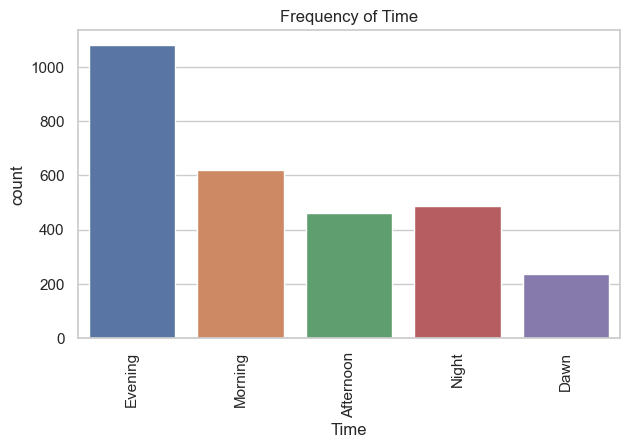

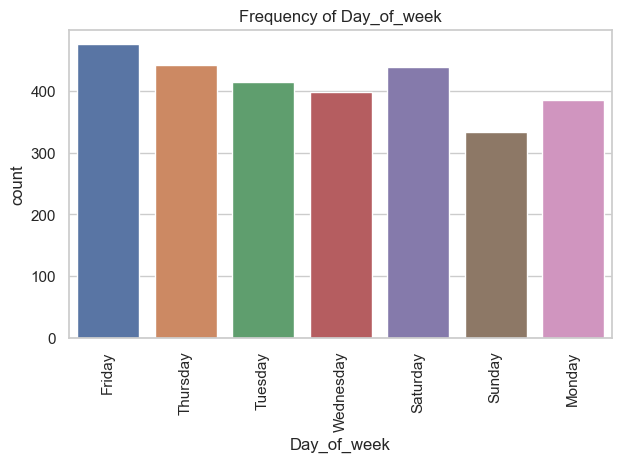

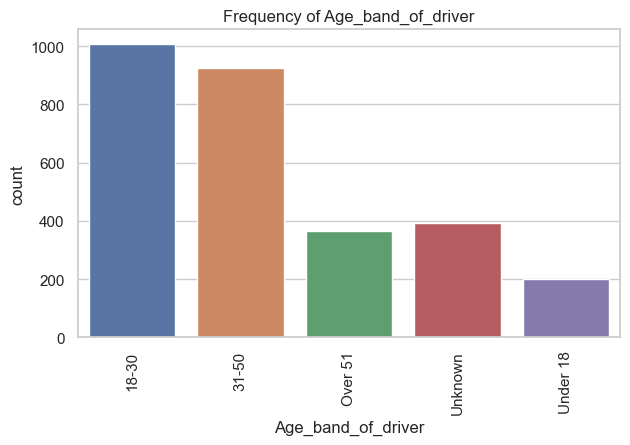

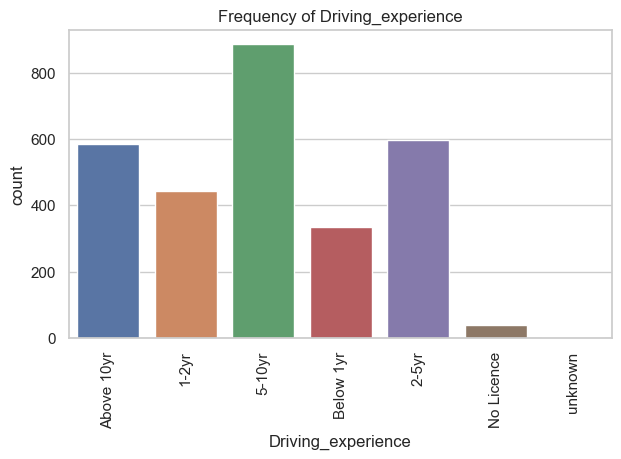

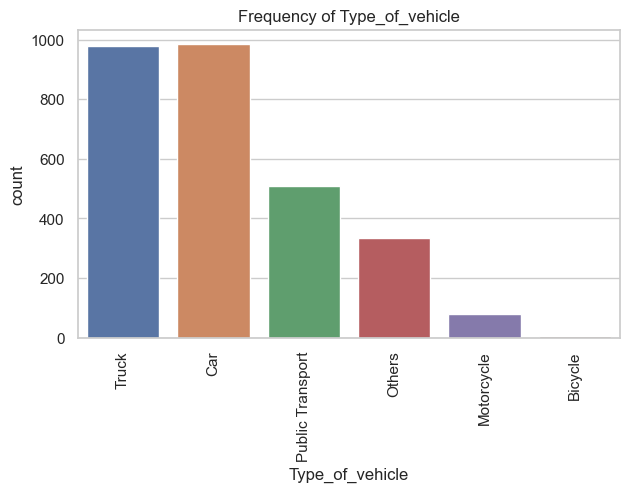

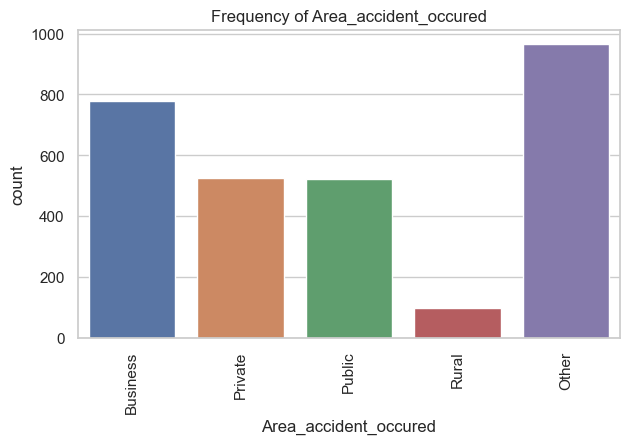

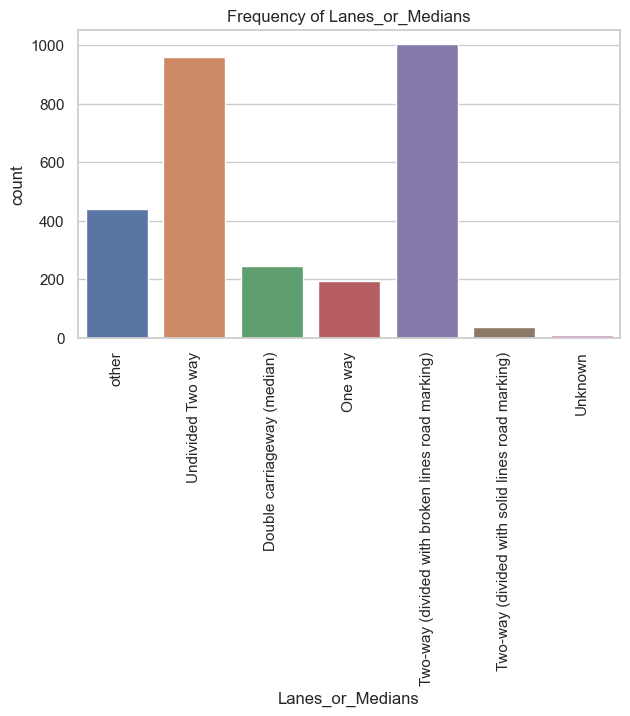

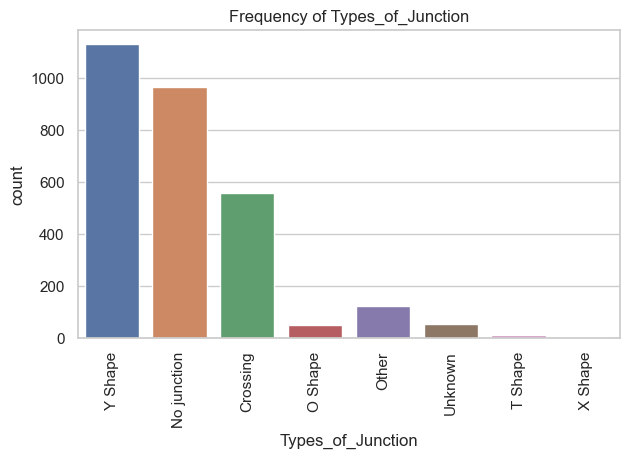

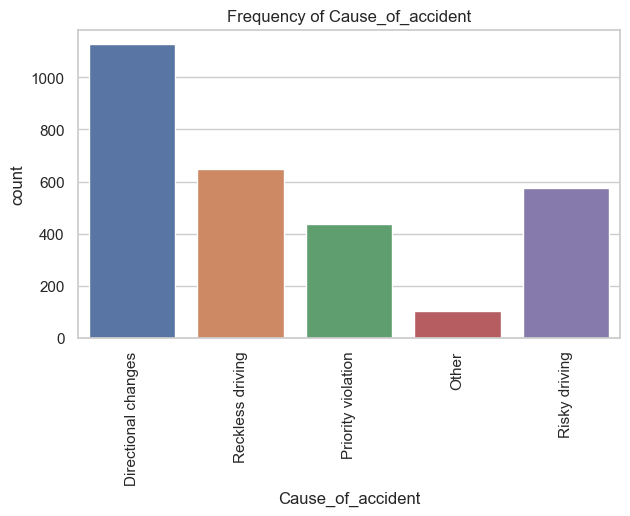

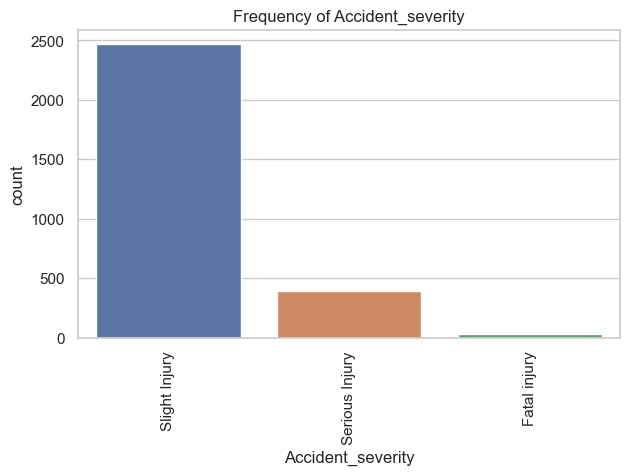

In [29]:
for column in categorical_columns:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df_new, x=column)
    plt.title(f'Frequency of {column}')
    plt.xticks(rotation=90)
    plt.show()

### Accident related to the driver's age and experience

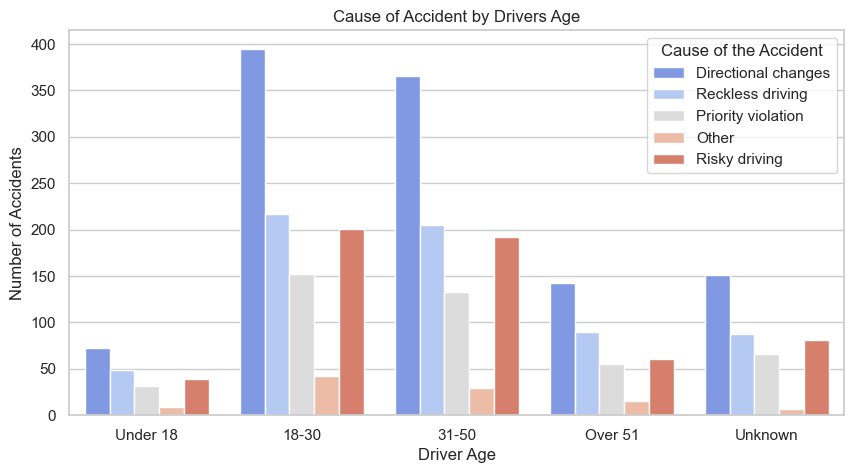

In [30]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Age_band_of_driver', hue='Cause_of_accident', data=df_new, palette='coolwarm',
             order = ['Under 18','18-30','31-50','Over 51','Unknown'])
plt.title('Cause of Accident by Drivers Age')
plt.xlabel('Driver Age')
plt.ylabel('Number of Accidents')
plt.legend(title='Cause of the Accident')
plt.xticks(rotation=0)
plt.show()

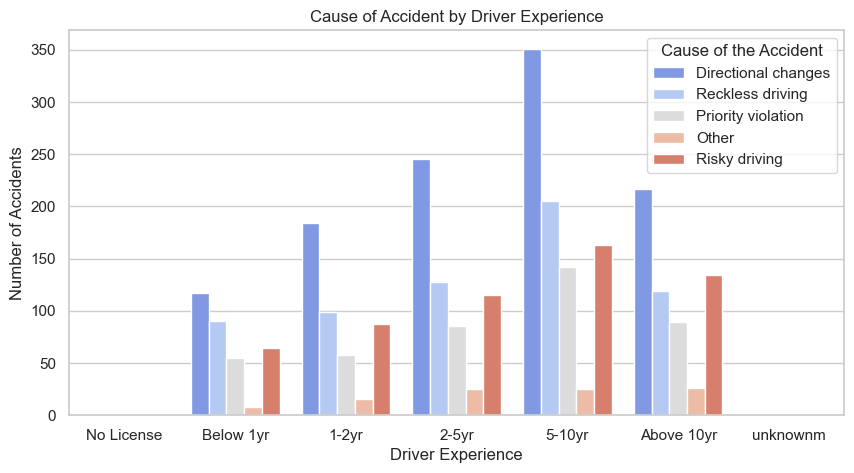

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Driving_experience', hue='Cause_of_accident', data=df_new, palette='coolwarm',
             order = ['No License','Below 1yr','1-2yr','2-5yr','5-10yr','Above 10yr','unknownm'])
plt.title('Cause of Accident by Driver Experience')
plt.xlabel('Driver Experience')
plt.ylabel('Number of Accidents')
plt.legend(title='Cause of the Accident', loc=1)
plt.xticks(rotation=0)
plt.show()

### Accidents related to the time of day and the area where they occur

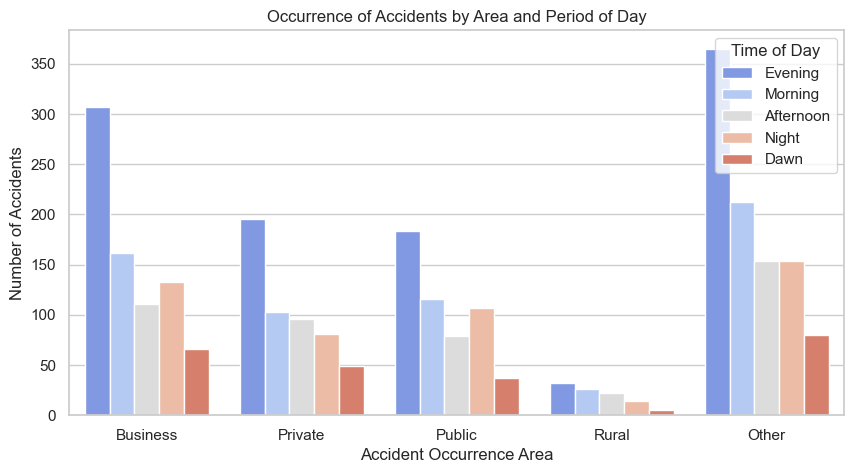

In [32]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Area_accident_occured', hue='Time', data=df_new, palette='coolwarm')
plt.title('Occurrence of Accidents by Area and Period of Day')
plt.xlabel('Accident Occurrence Area')
plt.ylabel('Number of Accidents')
plt.legend(title='Time of Day', loc=1)
plt.xticks(rotation=0)
plt.show()

### Analyze accident severity distribution over days of the week and time of day

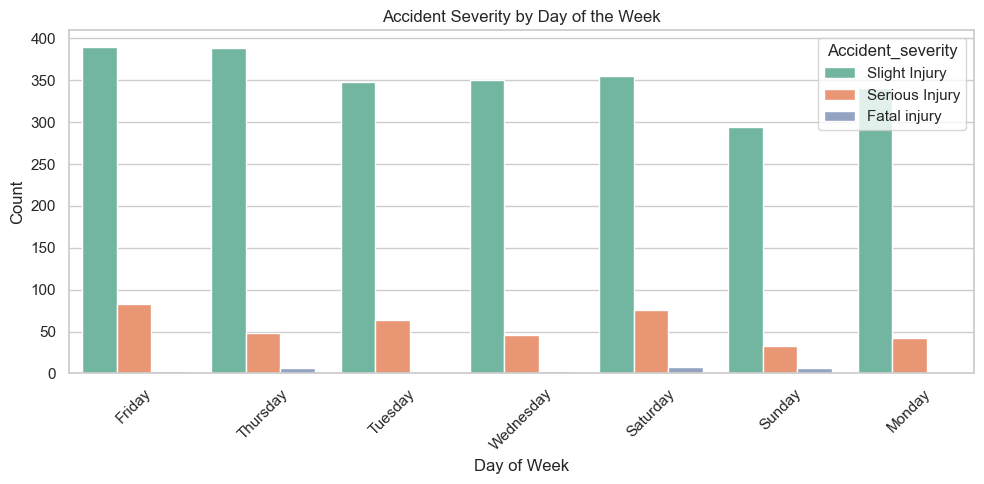

In [33]:
# Accident Severity by Day of Week

plt.figure(figsize=(10, 5))
sns.countplot(data=df_new, x='Day_of_week', hue='Accident_severity', palette='Set2')
plt.title('Accident Severity by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

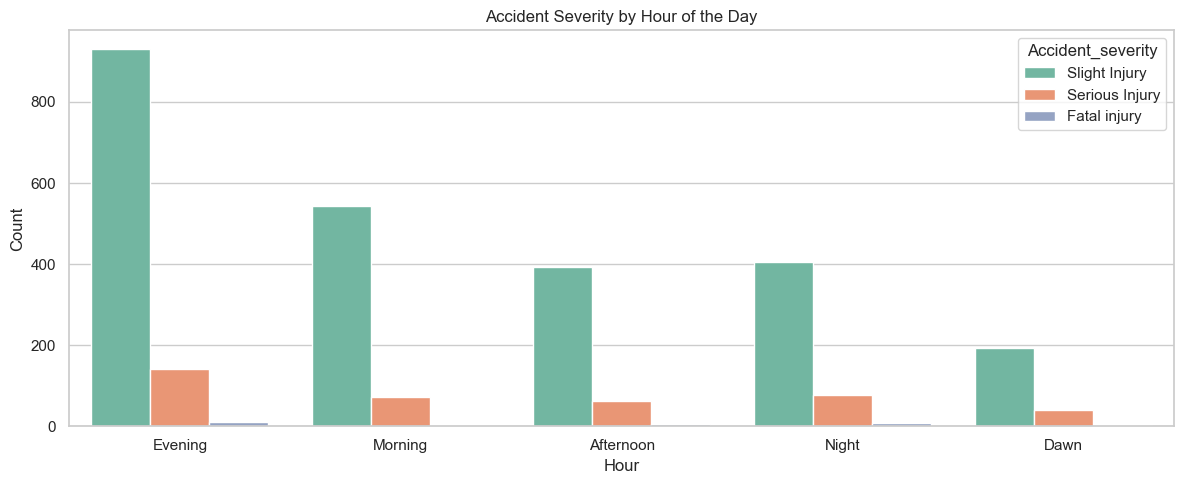

In [34]:
# Accident Severity by Hour of Day

plt.figure(figsize=(12, 5))
sns.countplot(data=df_new, x='Time', hue='Accident_severity', palette='Set2')
plt.title('Accident Severity by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Machine Learning Models

#### Data Preparation

In [35]:
df_new = df_new.dropna(subset=['Accident_severity'])

In [36]:
for col in df_new.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('Unknown')
    else:
        df[col] = df[col].fillna(-1)


In [37]:
X = df_new.drop(columns=['Accident_severity'])
y = df_new['Accident_severity'].map({'Slight Injury':2, 'Serious Injury': 1, 'Fatal injury': 0})

In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [39]:
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

In [40]:
X.head(), y_encoded[:5], target_encoder.classes_

(    Time  Day_of_week  Age_band_of_driver  Driving_experience  \
 8      2            0                   0                   3   
 9      2            0                   0                   0   
 12     2            4                   0                   0   
 13     2            4                   1                   2   
 14     2            4                   1                   3   
 
     Type_of_vehicle  Area_accident_occured  Lanes_or_Medians  \
 8                 5                      0                 6   
 9                 1                      2                 4   
 12                4                      0                 0   
 13                5                      0                 6   
 14                1                      0                 4   
 
     Types_of_Junction  Cause_of_accident  
 8                   7                  0  
 9                   7                  0  
 12                  1                  3  
 13                  1            

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [43]:
y_lr_pred= lr_model.predict(X_test)
y_lr_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [44]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
lr_cr=classification_report(y_test, y_lr_pred)
print(lr_cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00        67
           2       0.87      1.00      0.93       503

    accuracy                           0.87       578
   macro avg       0.29      0.33      0.31       578
weighted avg       0.76      0.87      0.81       578



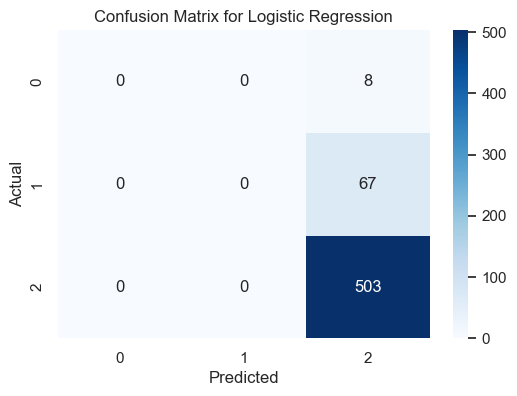

In [45]:
# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_lr_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(criterion='entropy', random_state=0)  
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [47]:
y_dt_pred= dt_model.predict(X_test)
y_dt_pred

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,

In [48]:
dt_cr=classification_report(y_test, y_dt_pred)
print(dt_cr)

              precision    recall  f1-score   support

           0       0.09      0.12      0.11         8
           1       0.13      0.16      0.14        67
           2       0.89      0.85      0.87       503

    accuracy                           0.76       578
   macro avg       0.37      0.38      0.37       578
weighted avg       0.79      0.76      0.77       578



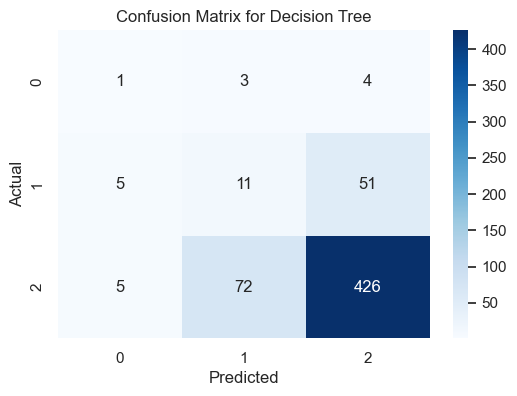

In [49]:
# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_dt_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## K Nearest Neighbor

In [50]:
from sklearn.neighbors import KNeighborsClassifier  
knn_model= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [51]:
y_knn_pred= knn_model.predict(X_test)
y_knn_pred

array([2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [52]:
knn_cr=classification_report(y_test, y_knn_pred)
print(knn_cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.06      0.01      0.02        67
           2       0.87      0.97      0.92       503

    accuracy                           0.85       578
   macro avg       0.31      0.33      0.31       578
weighted avg       0.76      0.85      0.80       578



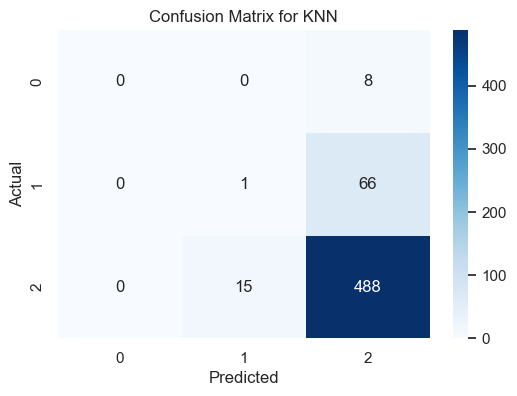

In [53]:
# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_knn_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Gaussian Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [55]:
y_gnb_pred= gnb_model.predict(X_test)
y_gnb_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [56]:
gnb_cr=classification_report(y_test, y_gnb_pred)
print(gnb_cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00        67
           2       0.87      1.00      0.93       503

    accuracy                           0.87       578
   macro avg       0.29      0.33      0.31       578
weighted avg       0.76      0.87      0.81       578



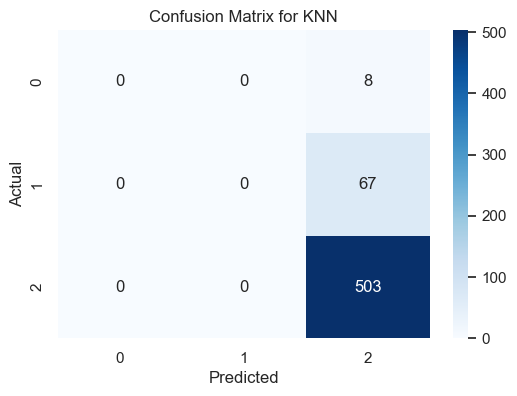

In [57]:
# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_gnb_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Support Vector Classifier

In [58]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [59]:
y_svc_pred= svc_model.predict(X_test)
y_svc_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [60]:
svc_cr=classification_report(y_test, y_svc_pred)
print(svc_cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00        67
           2       0.87      1.00      0.93       503

    accuracy                           0.87       578
   macro avg       0.29      0.33      0.31       578
weighted avg       0.76      0.87      0.81       578



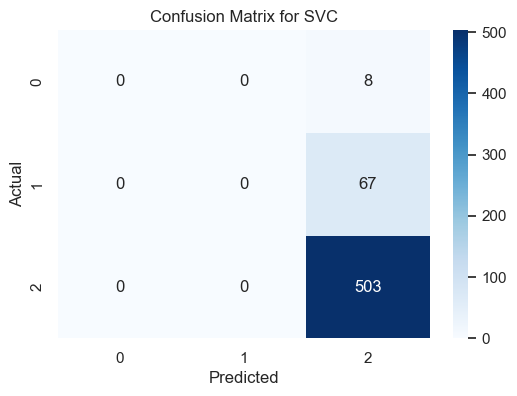

In [61]:
# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_svc_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
y_rf_pred= rf_model.predict(X_test)
y_rf_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [64]:
rf_cr=classification_report(y_test, y_rf_pred)
print(rf_cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.14      0.01      0.03        67
           2       0.87      0.99      0.93       503

    accuracy                           0.86       578
   macro avg       0.34      0.33      0.32       578
weighted avg       0.77      0.86      0.81       578



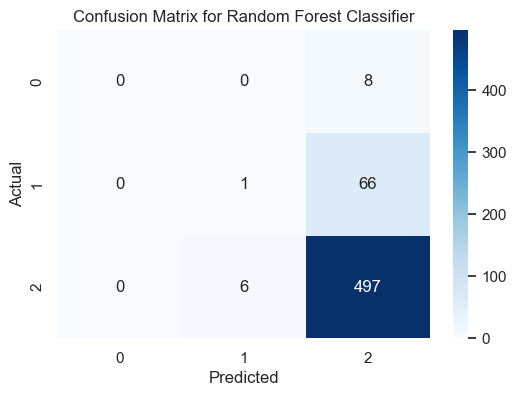

In [65]:
# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Comparing Each Model

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


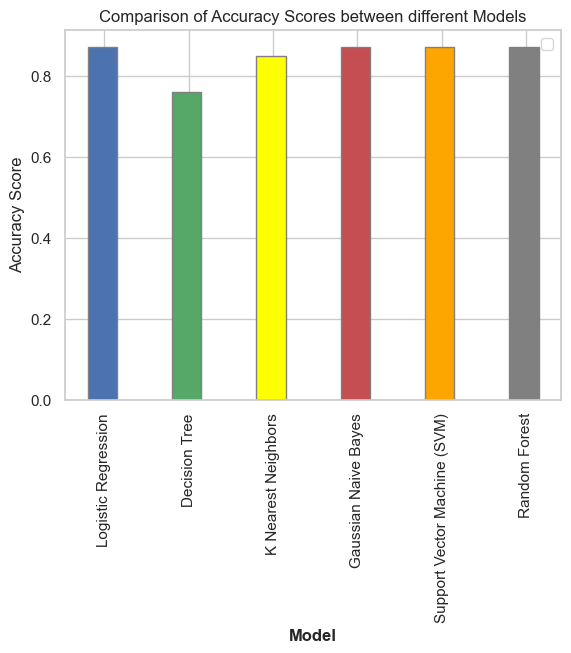

In [66]:
models = ['Logistic Regression', 'Decision Tree', 'K Nearest Neighbors', 'Gaussian Naive Bayes', 
          'Support Vector Machine (SVM)', 'Random Forest']
accuracy = [ 0.87, 0.76, 0.85, 0.87, 0.87, 0.87]

bar_width = 0.35

r1 = np.arange(len(accuracy))


plt.bar(r1, accuracy, color=['b', 'g', 'yellow', 'r', 'orange', 'grey'], width=bar_width, edgecolor='grey')

plt.xlabel('Model', fontweight='bold')
plt.ylabel('Accuracy Score')
plt.xticks([r1 + bar_width/15 for r1 in range(len(accuracy))], models, rotation=90)
plt.title('Comparison of Accuracy Scores between different Models')

plt.legend()

plt.show()

## Time Series Analysis

In [67]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
df['Hour'] = df['Time'].dt.hour

In [68]:
hourly_counts = df['Hour'].value_counts().sort_index()

In [69]:
severity_by_hour = df.groupby(['Hour', 'Accident_severity']).size().unstack().fillna(0)

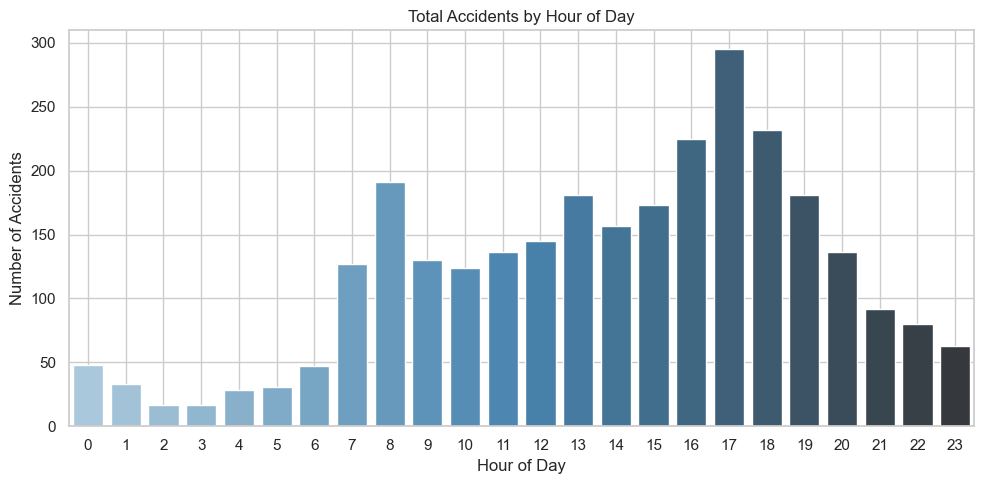

In [70]:
# Total accident count by hour
plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='Blues_d')
plt.title('Total Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

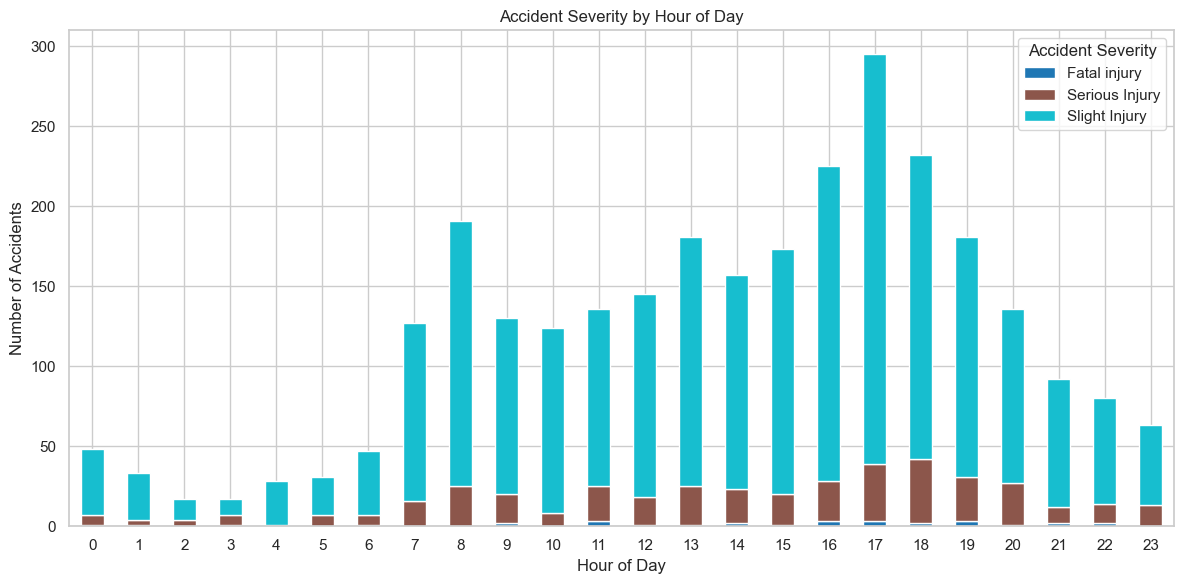

In [71]:
# Accident severity distribution by hour

severity_by_hour.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title('Accident Severity by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.legend(title='Accident Severity')
plt.grid(True)
plt.tight_layout()
plt.show()